## K - means

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [9]:

X1,y1 = make_blobs(n_samples = 50, centers = 3,n_features = 2
                 , random_state = 0,cluster_std = 0.5,shuffle = True)
print(X1)


[[ 1.45131429  4.22810872]
 [ 1.73810647  0.71629308]
 [ 1.19820169  4.47062449]
 [ 1.13280393  3.87673946]
 [-1.72849249  3.5291048 ]
 [ 0.5323772   3.31338909]
 [-1.521654    3.81081751]
 [-0.58532866  2.24400273]
 [ 1.7190373   0.71788708]
 [-1.32573319  2.57547722]
 [-1.46344797  3.11887694]
 [ 1.53099104  0.18765469]
 [ 0.78260667  4.15263595]
 [ 1.24016835  1.12905479]
 [ 2.08852613  1.04889961]
 [ 2.11114739  3.57660449]
 [-0.30022483  4.63059663]
 [-0.93751423  2.82791984]
 [-0.78277792  3.86582685]
 [ 0.802314    4.38196181]
 [ 1.64869438  0.03452236]
 [ 1.2483186   0.79129352]
 [ 1.80044143  0.67862651]
 [ 1.04829186  5.03092408]
 [-1.34872081  3.27116885]
 [-2.11346572  3.88969285]
 [-2.10947893  3.3682955 ]
 [ 2.62496786  0.28025075]
 [-1.68268028  2.94596493]
 [ 0.99914934  4.2101954 ]
 [ 1.42886984  1.28640884]
 [ 1.40848818  3.93270482]
 [-2.16214651  3.40258062]
 [ 2.4198128   0.96215512]
 [ 1.79986495  0.30734757]
 [ 1.72330962  4.2012082 ]
 [ 1.60753424  1.09111491]
 

In [21]:
print(y1)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


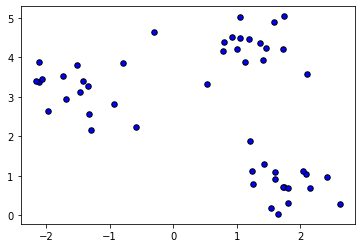

In [10]:
plt.scatter(X1[:,0],X1[:,1], c = 'blue', marker = 'o', edgecolor = 'black', s = 30 )
plt.show()

In [11]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 100,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X1)

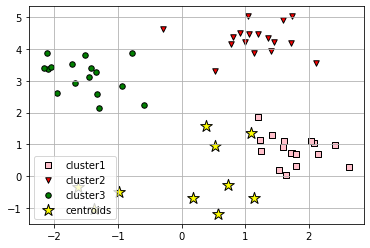

In [16]:
#PLOT 3 CLUSTERS
plt.scatter(X1[y_km == 0,0],X1[y_km == 0,1], c = 'pink', marker = 's',edgecolor = 'black',s = 30, label = 'cluster1')
plt.scatter(X1[y_km == 1,0],X1[y_km == 1,1], c = 'red', marker = 'v',edgecolor = 'black',s = 30,label = 'cluster2')
plt.scatter(X1[y_km == 2,0],X1[y_km == 2,1],c = 'green', marker ='o',edgecolor = 'black',s = 30,label = 'cluster3')

# plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=150, marker='*',c='yellow', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

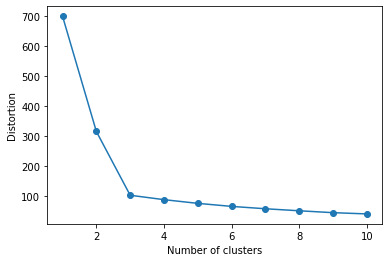

In [13]:
# Elbow curve method using dispersion for choosing number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [21]:
# sillhoute score for choosing number of clusters
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(X1,y_km)}')

Silhouette Score(n=3): 0.7166433000447643


## Agglomerative Clustering


In [3]:
from sklearn.datasets import make_circles
X2,y2 = make_circles(n_samples = (8,7), random_state = 0,shuffle = True)
print(X2)
print(y2)


[[ 7.07106781e-01  7.07106781e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 8.00000000e-01  0.00000000e+00]
 [ 4.98791841e-01  6.25465186e-01]
 [ 4.98791841e-01 -6.25465186e-01]
 [-1.00000000e+00  1.22464680e-16]
 [ 6.12323400e-17  1.00000000e+00]
 [-1.78016747e-01 -7.79942330e-01]
 [-1.78016747e-01  7.79942330e-01]
 [ 7.07106781e-01 -7.07106781e-01]
 [-7.20775094e-01  3.47106991e-01]
 [-7.07106781e-01  7.07106781e-01]
 [ 1.00000000e+00  0.00000000e+00]
 [-7.07106781e-01 -7.07106781e-01]
 [-7.20775094e-01 -3.47106991e-01]]
[0 0 1 1 1 0 0 1 1 0 1 0 0 0 1]


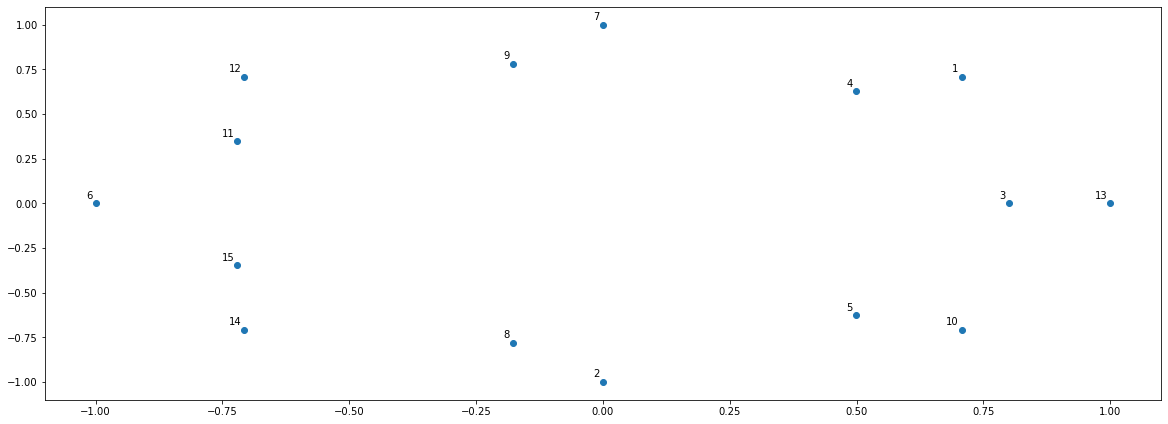

In [75]:
labels = range(1, 16)
plt.figure(figsize=(20, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X2[:,0],X2[:,1], label='True Position')

for label, x, y in zip(labels, X2[:, 0], X2[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

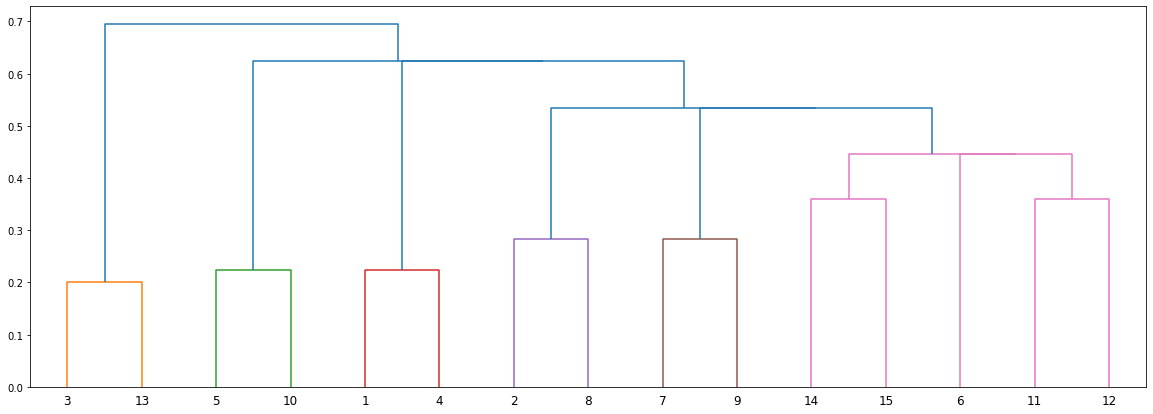

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X2, 'single')
labelList = range(1, 16)

plt.figure(figsize=(20, 7))
dendrogram(linked,orientation='top', labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

## CURE

In [9]:
from sklearn.datasets import make_moons
X3,y3 = make_moons(n_samples = 10, random_state = 0)
print(X3)
print(y3)

[[ 6.12323400e-17  1.00000000e+00]
 [ 1.70710678e+00 -2.07106781e-01]
 [-1.00000000e+00  1.22464680e-16]
 [ 2.00000000e+00  5.00000000e-01]
 [ 7.07106781e-01  7.07106781e-01]
 [ 2.92893219e-01 -2.07106781e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [-7.07106781e-01  7.07106781e-01]
 [ 1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e-01]]
[0 1 0 1 0 1 1 0 0 1]


## BIRCH

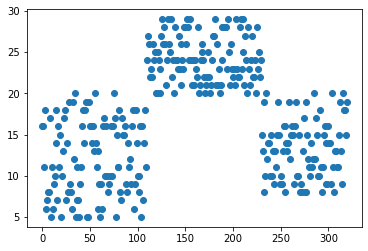

In [17]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
np.random.seed(12)
p1 = np.random.randint(5,21,110) 
p2 = np.random.randint(20,30,120)
p3 = np.random.randint(8,21,90)

data = np.array(np.concatenate([p1, p2, p3]))
x_range = range(len(data))
x = np.array(list(zip(x_range, data))).reshape(len(x_range), 2)

#We can visualize it in a plot.

plt.scatter(x[:,0], x[:,1])
plt.show()


Birch(branching_factor=100, threshold=0.7)


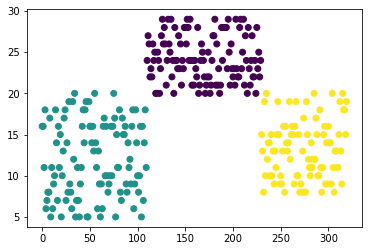

Birch(branching_factor=100, threshold=0.2)


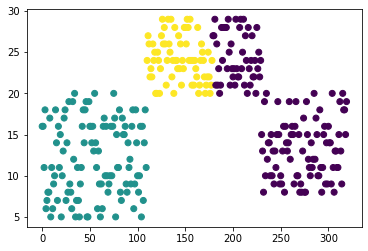

In [28]:
bclust=Birch(branching_factor=100, threshold=0.7).fit(x)
print(bclust)
Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.7)
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()
bclust=Birch(branching_factor=100, threshold=0.2).fit(x)
print(bclust)
Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.2)
labels = bclust.predict(x)
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()


### DBSCAN

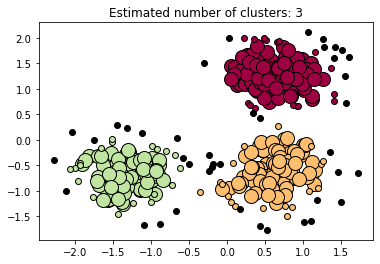

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=350, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()